# Aula 6 - Correlação e Normalidade

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Testes de normalidade
- 2) Correlação

___
___
___

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

___
___
___



## 1) Testes de normalidade


Vamos agora ver alguns **teste estatísticos** que são utilizados para determinar se uma amostra segue uma distribuição normal ou não.

Os testes que faremos vão retornar dois resultados:

- **Estatística de teste**: uma quantidade numérica calculada pelo teste utilizando os dados da amostra;
- **p-value**: um valor de probabilidade que é utilizado para interpretar o resultado do teste.

O teste irá **assumir que a amostra analisada foi construída a partir de uma distribuição normal**. 

Essa é a **HIPÓTESE NULA ($H_0$) do teste**.

O que o p-value nos dá é **a probabilidade de termos encontrado o valor da estatística de teste assumindo a hipótese nula**.

Ou seja, se a amostra de fato for normal, qual é a probabilidade de termos encontrado o valor da estatística de teste?

Se essa probabilidade for **muito baixa**, quer dizer que **seria extremamente improvável que encontrássemos aquele valor pra estatística de teste se de fato a amostra fosse normal**, e, portanto, dizemos que os dados **nos dão evidência suficiente para rejeitar a hipótese nula: ou seja, a amostra NÃO é normal.**

Se, por outro lado, o p-value for alto, isso quer dizer que **falhamos em rejeitar a hipótese nula** -- não podemos dizer que a a amostra *não* é normal. Isso não quer dizer que a hipótese nula é verdadeira -- mas não temos evidências a favor de sua rejeição.

Em geral, o p-value ser "pequeno" ou "grande" se dá em termos de um **nível de significância** $\alpha$, que normalmente é tomado como  $\alpha = 5\%$. 

Assim, a forma simples de interpretar os resultados do teste, é:

- $ p \leq \alpha \ ( p \leq 0.05) \ $: rejeitamos a $H_0$: distribuição amostral não é normal;

- $ p > \alpha \ ( p > 0.05) \ $: falhamos em rejeitar a $H_0$: distribuição amostral parece ser normal;

Se você quiser saber mais sobre testes de normalidade, [clique aqui!](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/), ou [aqui](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)

Vamos agora conhecer alguns testes! 

______

Vamos criar duas amostras, uma claramente normal, e outra não:

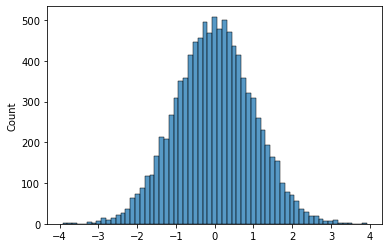

In [2]:
np.random.seed(42)
normal = np.random.normal(0, 1, 10000)

sns.histplot(normal)

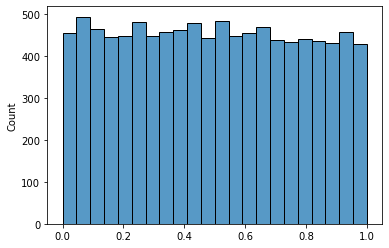

In [3]:
np.random.seed(42)
uniforme = np.random.rand(10000)

sns.histplot(uniforme)

__D’Agostino’s K^2 Test__

O teste K^2 de D’Agostino’s é baseado nas estatísticas descritivas **kurtosis** e **skewness**:

- **Skewness** é uma medida de **assimetria** da distribuição, isto é, o quanto ela é deslocada para a esquerda ou direita.
    - **A distribuição normal tem skewness igual a 0**

- **Kurtosis** quantifica a porção dos dados na **cauda** da distribuição -- ou seja, valores mais extremos.
    - **A distribuição normal tem kurtosis igual a 3**

<img src="https://i.pinimg.com/originals/0f/c7/66/0fc7666e8c1ab2822ad7a8e4fb534b88.gif" width=500>

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)

A função `normaltest()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste e o respectivo p-value.

In [4]:
# importa o teste
from scipy.stats import normaltest

In [5]:
normaltest(normal)

NormaltestResult(statistic=0.33214260688733543, pvalue=0.8469858390291732)

In [6]:
# fazendo o teste
test_stat, p = normaltest(normal)

In [7]:
test_stat

0.33214260688733543

In [8]:
p

0.8469858390291732

In [9]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(normal)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.33214260688733543

p-value: 0.8469858390291732

Falha em rejeitar H_0: amostra parece ser normal


In [14]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(uniforme)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 7896.094621837173

p-value: 0.0

Rejeição da H_0: amostra não é normal


______

__Shapiro-Wilk Test__

O teste de Shapiro-Wilk é um dos testes de normalidade mais comuns e confiáveis, embora haja algumas sugestões de que o teste funcione melhor para amostras pequenas (algumas milhares de observações ou menos).

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

A função `shapiro()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste (W) e o respectivo p-value.

In [19]:
# importa o teste
from scipy.stats import shapiro

# fazendo o teste
test_stat, p = shapiro(normal)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.9999344944953918

p-value: 0.9986492395401001

Falha em rejeitar H_0: amostra parece ser normal


In [21]:
# importa o teste
from scipy.stats import shapiro

# fazendo o teste
test_stat, p = shapiro(uniforme)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.9556165337562561

p-value: 0.0

Rejeição da H_0: amostra não é normal


_______
________
______

## 2) Correlação

Um dos conceitos mais importantes em Data Science é o da **correlação**.

A partir de estudos de correlação, é possível **descobrirmos como diferentes variáveis interagem**.

<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>

É bem importante distinguirmos correlações **lineares** de **não lineares**. 

<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>

Para fazer a distinção acima, há testes específicos!

Para ilustrar as noções de correlação, vamos utilizar uma base de dados de alturas e pesos:

### 2.1) Coeficiente de correlação de Pearson

Este coeficiente expressa a **taxa de relação linear entre duas variáveis numéricas**. Quanto mais próximo de 1 ou -1, mais **linearmente correlacionado estão as variáveis testadas**

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.
 - as observações têm distribuição normal;
 
 **Interpretações:**
 - $H_0$: as amostras são linearmente independentes, isso é, não estão correlacionadas linearmente;
 - $H_1$: as amostras estão linearmente correlacionadas.


Vamos ver um exemplo concreto, utilizando uma base que contém informações de [peso e altura](https://www.kaggle.com/mustafaali96/weight-height) de diversas pessoas

In [10]:
df_wh = pd.read_csv('../datasets/weight-height.csv')

In [11]:
df_wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [12]:
# passando altura de polegadas pra centimetros
df_wh["Height"] = df_wh["Height"] * 2.54

# passando peso de libras pra quilos
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


In [13]:
df_wh.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228865
std,9.772721,14.564292
min,137.828359,29.347785
25%,161.304276,61.606664
50%,168.447898,73.125704
75%,175.702625,84.899540
max,200.656806,122.466524


Note que a mediana e a média são bem próximas... Isso é um indicativo de normalidade!

__Vamos dar uma olhada na distribuição da altura e do peso...__

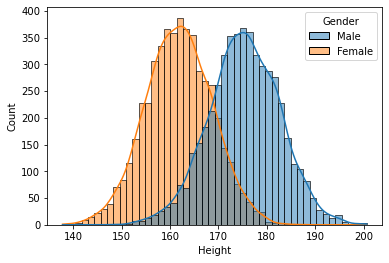

In [14]:
sns.histplot(data=df_wh, x="Height", hue="Gender", kde=True)

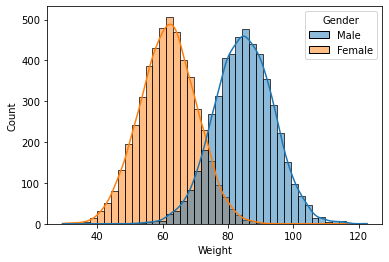

In [15]:
sns.histplot(data=df_wh, x="Weight", hue="Gender", kde=True)

Parece que as variáveis de fato são normalmente distribuídas!

Podemos fazer um teste de normalidade para ter um pouco mais de certeza...

In [30]:
h = df_wh["Height"]
w = df_wh["Weight"]

In [31]:
test_stat, p = normaltest(h)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")
    
print("\n\n")

test_stat, p = normaltest(w)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 169.41938520422448

p-value: 1.625728200302372e-37

Rejeição da H_0: amostra não é normal



Estatística de teste: 827.7731149258786

p-value: 1.7838238241262146e-180

Rejeição da H_0: amostra não é normal


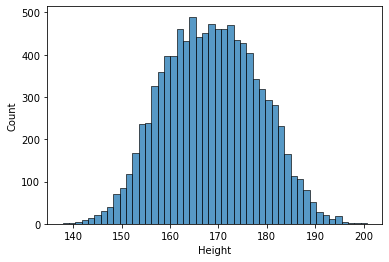

In [32]:
sns.histplot(data=df_wh, x="Height")

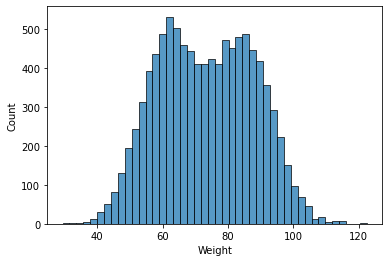

In [33]:
sns.histplot(data=df_wh, x="Weight")

In [19]:
h_homens = df_wh[df_wh["Gender"] == "Male"]["Height"]
w_homens = df_wh[df_wh["Gender"] == "Male"]["Weight"]

In [25]:
test_stat, p = normaltest(h_homens)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")
    
print("\n\n")

test_stat, p = normaltest(w_homens)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 4.278504989485192

p-value: 0.11774282351434068

Falha em rejeitar H_0: amostra parece ser normal



Estatística de teste: 3.5589807526303403

p-value: 0.16872411116536784

Falha em rejeitar H_0: amostra parece ser normal


In [26]:
h_mulheres = df_wh[df_wh["Gender"] == "Female"]["Height"]
w_mulheres = df_wh[df_wh["Gender"] == "Female"]["Weight"]

In [28]:
test_stat, p = normaltest(h_mulheres)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")
    
print("\n\n")

test_stat, p = normaltest(w_mulheres)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.9210205347636282

p-value: 0.6309616042245196

Falha em rejeitar H_0: amostra parece ser normal



Estatística de teste: 1.171248212332309

p-value: 0.5567582770847843

Falha em rejeitar H_0: amostra parece ser normal


Será que as variáveis estão relacionadas?

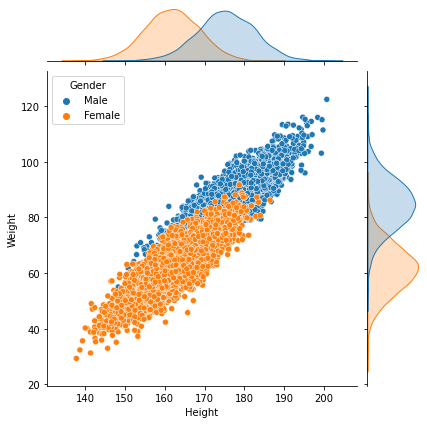

In [29]:
sns.jointplot(data=df_wh, x="Height", y="Weight", hue="Gender")

Vamos olhar separadamenter para o sexo...

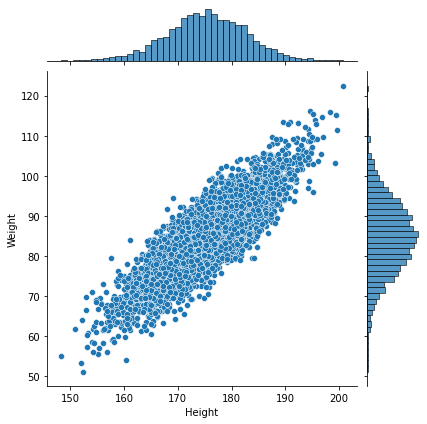

In [34]:
sns.jointplot(data=df_wh[df_wh["Gender"]=="Male"], x="Height", y="Weight")

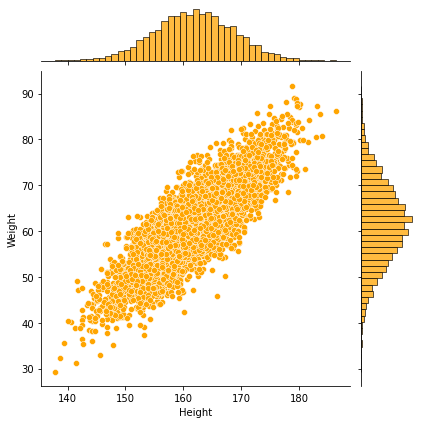

In [35]:
sns.jointplot(data=df_wh[df_wh["Gender"]=="Female"], x="Height", y="Weight", color="orange")

Aperentemente há uma relação **linear** entre as variáveis! 

Vamos dar uma olhada no teste de Pearson:

In [37]:
from scipy.stats import pearsonr

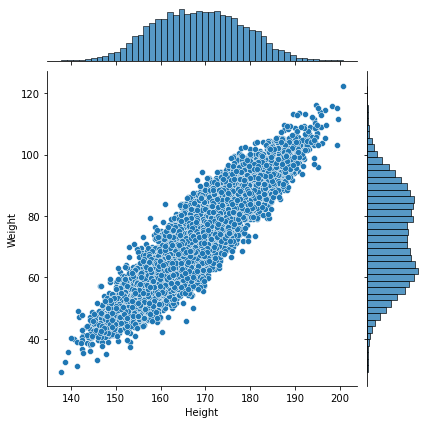

In [39]:
sns.jointplot(data=df_wh, x="Height", y="Weight")

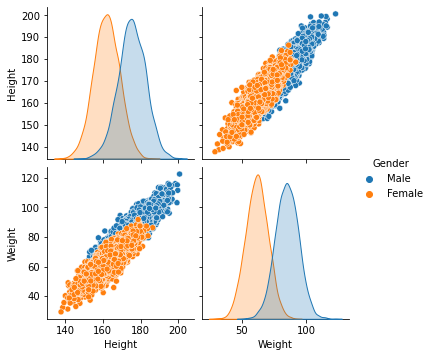

In [65]:
sns.pairplot(df_wh, hue="Gender")

In [38]:
import scipy

scipy.stats.pearsonr(df_wh["Weight"], df_wh["Height"])

(0.9247562987409147, 0.0)

Separadamente para os sexos:

In [40]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

(0.8629788486163177, 0.0)

In [42]:
scipy.stats.pearsonr(h_homens, w_homens)

(0.8629788486163177, 0.0)

In [41]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

(0.8496085914186009, 0.0)

Em ambos os casos (e para todos os dados), obtivemos um coeficiente de pearson bem próxima de 1!

E o p-valor foi 0, isso é: rejeitamos $H_0$, o que implica que as duas amostras **estão correlacionadas linearmente**!

___________

### 1.2) Coeficiente de correlação de Spearman

Este coeficiente indica se as amostras possuem correlação *monotônica*, isso é, **se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir**. 

O coeficiente varia entre -1 e 1:

> Quanto mais próximo de 1 for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir); 

> Quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar). 

> Uma correlação de 0 indica ausência de correlação.

**Importante:** o coeficiente de Spearman **não** indica correlação necessariamente linear!

**Suposições:** 
 - as observações são idependentes uma das outras e identicamente distribuidas.

 
 **Interpretação:**
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

Ao analisarmos os valores da base de altura e peso, é natural que tenhamos um coeficiente de Spearman próximo de 1, dado que percebemos claramente uma relação monotônica entre a svariáveis:

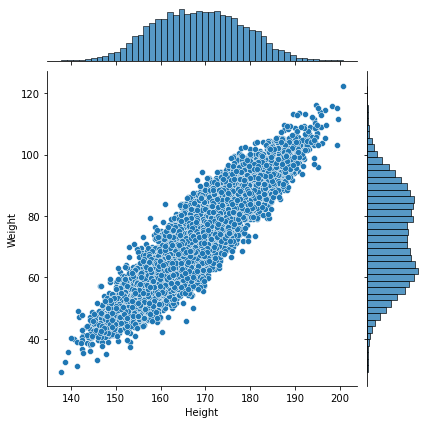

In [67]:
sns.jointplot(data=df_wh, x="Height", y="Weight")

In [66]:
scipy.stats.spearmanr(df_wh["Weight"], df_wh["Height"])

SpearmanrResult(correlation=0.9257076644210767, pvalue=0.0)

In [44]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

SpearmanrResult(correlation=0.8364885471875417, pvalue=0.0)

In [45]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

SpearmanrResult(correlation=0.8485589833503592, pvalue=0.0)

Vamos analisar outra base?

Desta vez, olharemos para uma base com informações relativas a [câncer de mama](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [47]:
df_bc = pd.read_csv('../datasets/breast_cancer.csv')

In [48]:
df_bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [49]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
sns.pairplot(df_bc, hue="diagnosis")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000064F2AEEA60> (for post_execute):


KeyboardInterrupt: 

In [50]:
df_bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Vamos dar uma olhada na distribuição das variáveis numéricas! (E não precisamos olhar pro ID...)

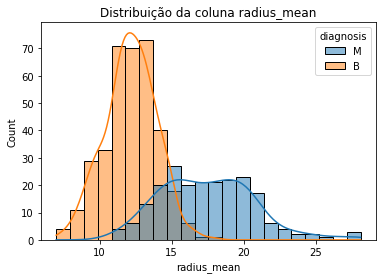

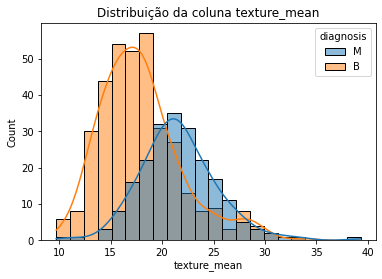

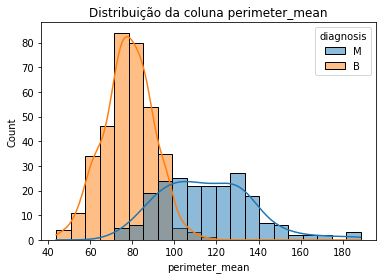

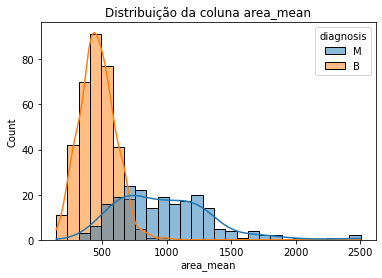

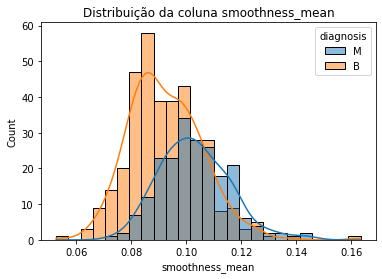

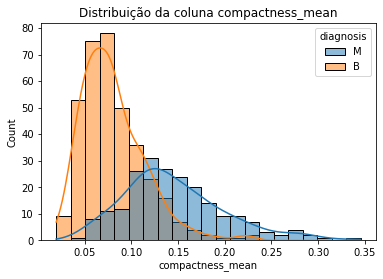

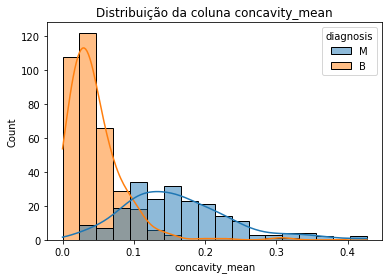

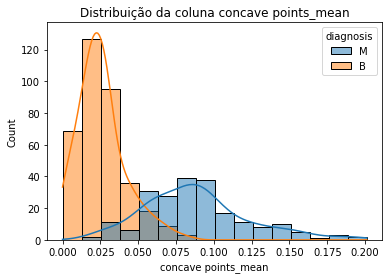

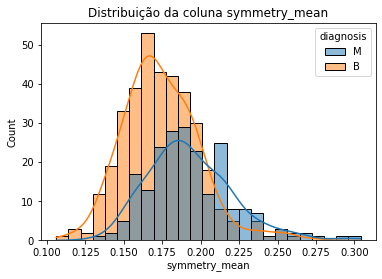

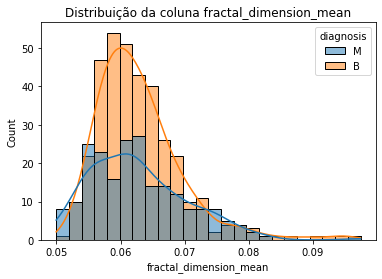

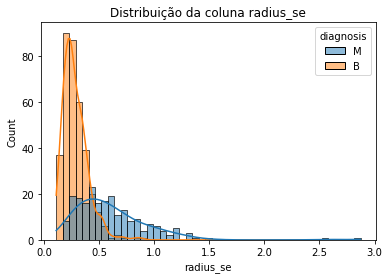

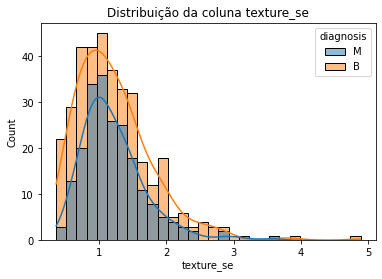

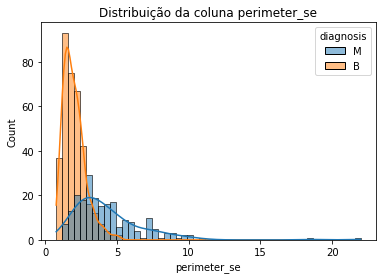

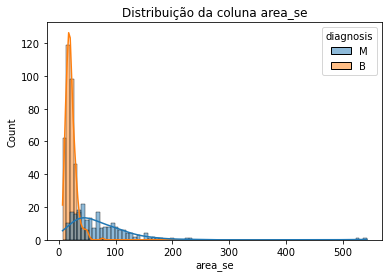

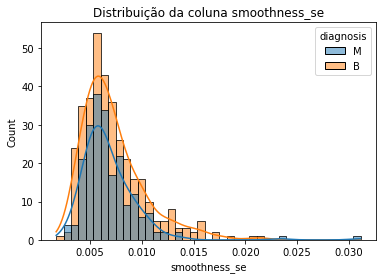

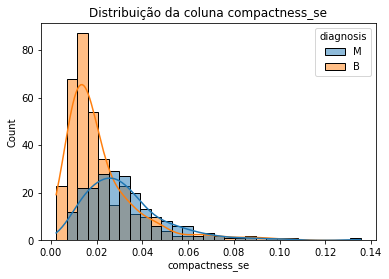

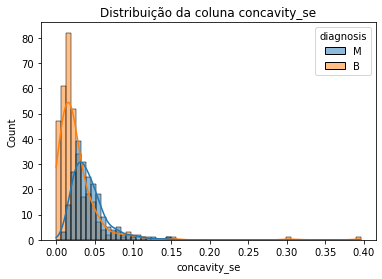

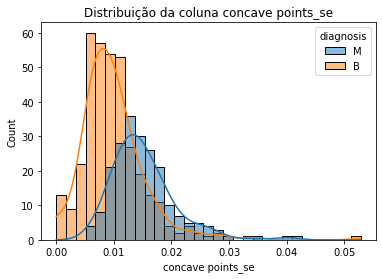

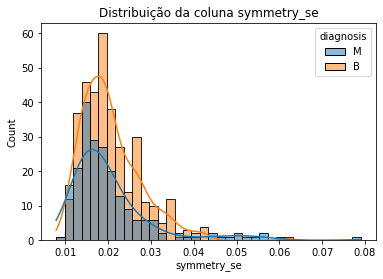

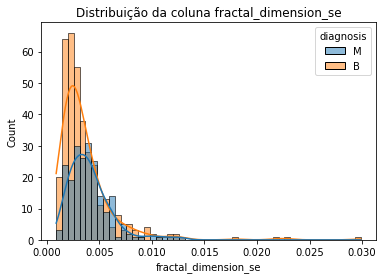

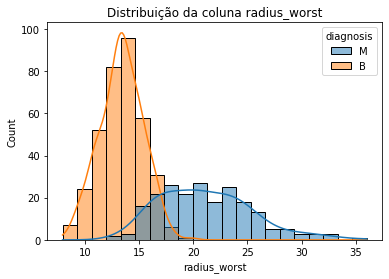

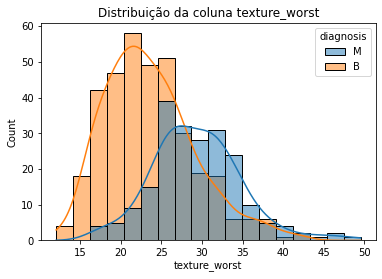

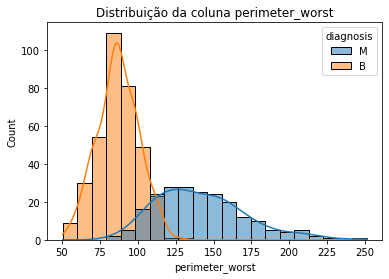

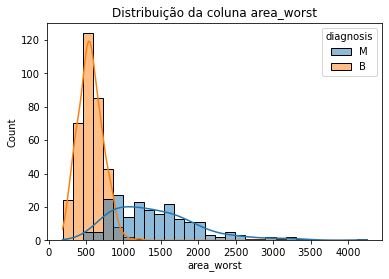

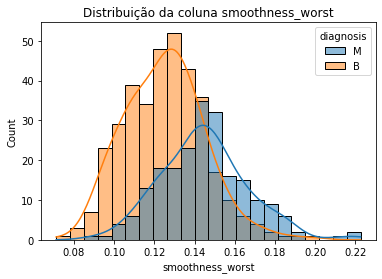

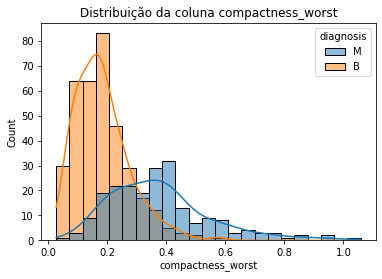

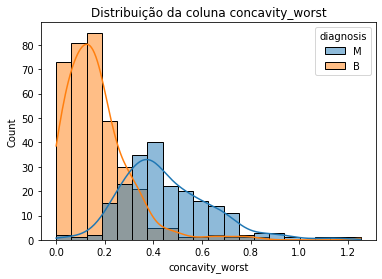

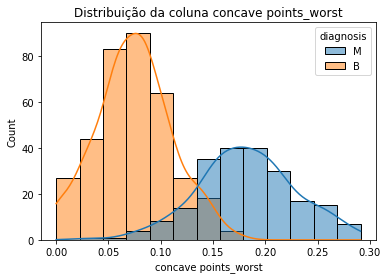

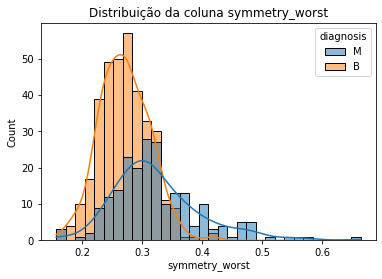

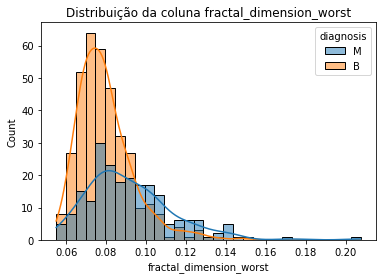

In [52]:
for col in df_bc.drop(columns=["id", "diagnosis"]).columns:
    
    plt.title("Distribuição da coluna " + col)
    
    sns.histplot(data = df_bc, x = col, kde=True, hue="diagnosis")

    plt.show()

Nenhuma tem distribuição normal... Neste caso, temos que usar o teste de correlação de spearman, para pelo menos buscarmos alguma correlação monotônica!

Vamos olhar, por exemplo, para as variáveis "radius_mean" e "area_mean":


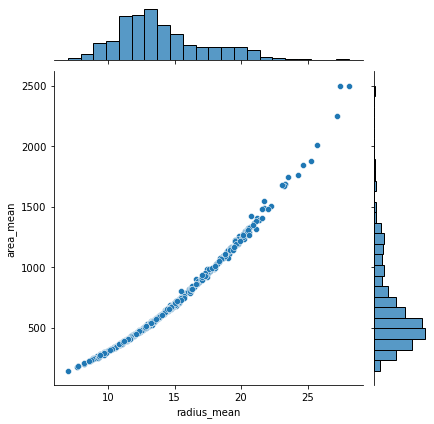

In [53]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean")

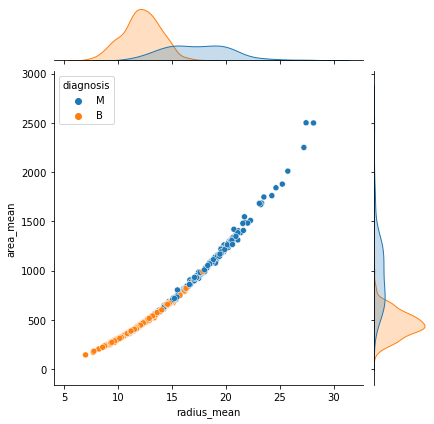

In [54]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean", hue="diagnosis")

Claramente parece haver alguma correlação! Vamos ver o que o teste de spearman diz:

In [55]:
scipy.stats.spearmanr(df_bc["radius_mean"], df_bc["area_mean"])

SpearmanrResult(correlation=0.9996020278067481, pvalue=0.0)

Correlação bem próxima de 1, com p-value 0!

Dessa forma, com um nível de significância de 5%, rejeitamos $H_0$, ou seja, as variáveis **são positivamente monotônicamente dependentes!**

Caso queiramos avaliar a correlação de outras variáveis:

In [58]:
df_bc.drop(columns="id").corr(method="spearman")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_mean,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_mean,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_mean,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_mean,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_mean,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,...,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_mean,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,...,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_mean,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,...,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110
symmetry_mean,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,...,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069
fractal_dimension_mean,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,...,-0.294540,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771


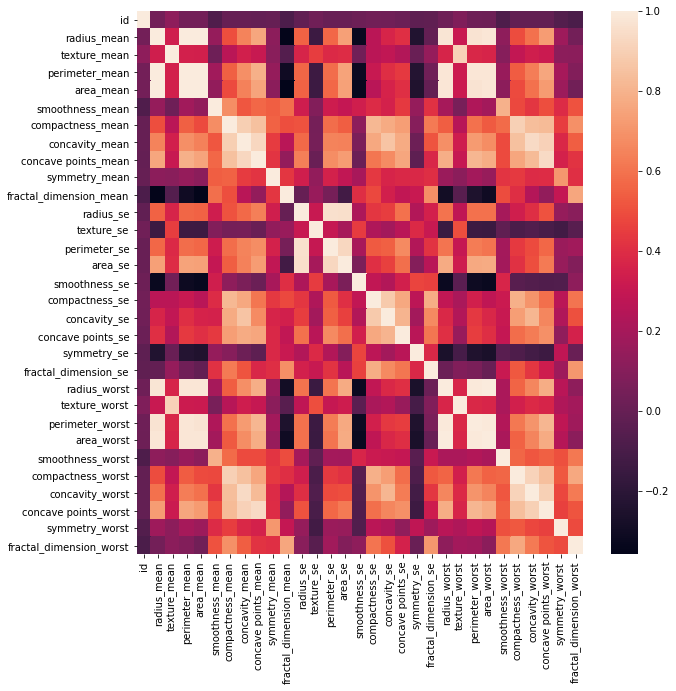

In [59]:
plt.figure(figsize=(10, 10))

sns.heatmap(df_bc.corr(method="spearman"))

In [60]:
df_bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

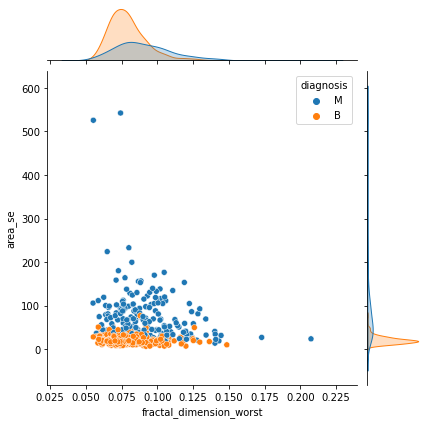

In [63]:
sns.jointplot(data=df_bc, x="fractal_dimension_worst", y="area_se", hue="diagnosis")

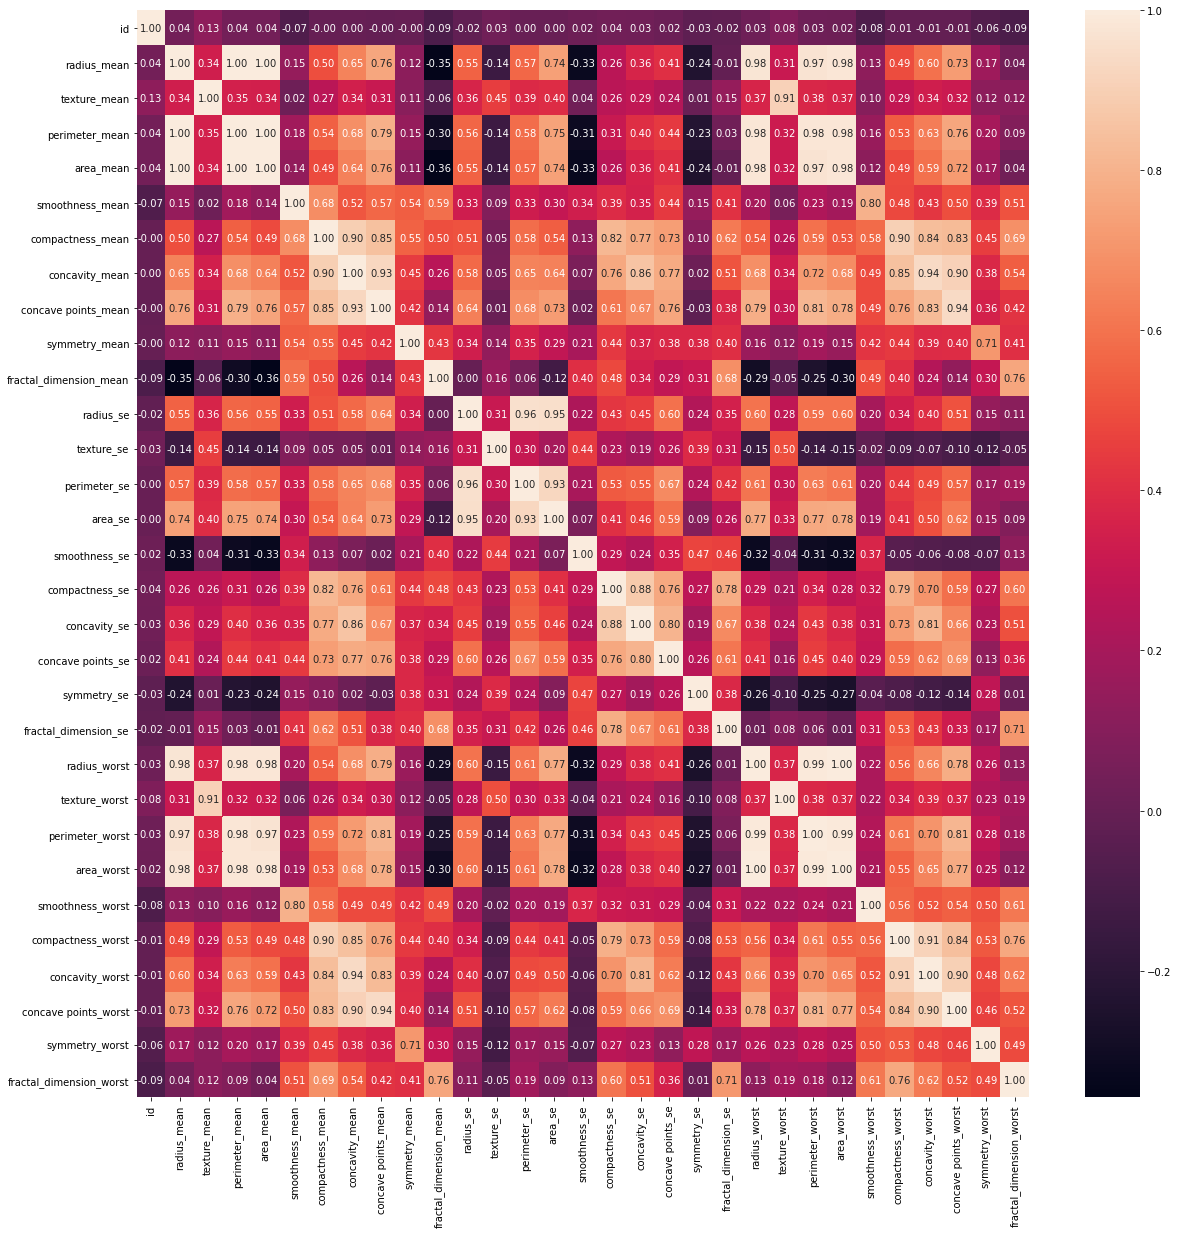

In [64]:
plt.figure(figsize=(20, 20))

sns.heatmap(df_bc.corr(method="spearman"), annot=True, fmt=".2f")